In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("bike_crash.csv")

In [3]:
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn


In [4]:
df1 = df
df1.replace('No Data',np.nan,inplace = True)
df1.replace('Unknown',np.nan,inplace = True)
df1.replace('None',np.nan,inplace = True)
df1.isnull().sum()

$1000 Damage to Any One Person's Property       0
Active School Zone Flag                         0
At Intersection Flag                            0
Average Daily Traffic Amount                 2110
Construction Zone Flag                          0
Crash Severity                                  0
Crash Time                                      0
Crash Total Injury Count                        0
Crash Year                                      0
Day of Week                                     0
Highway System                               2079
Intersection Related                            0
Light Condition                                14
Road Class                                      0
Roadway Part                                    0
Speed Limit                                     0
Surface Condition                              12
Traffic Control Type                          599
Weather Condition                              17
Person Helmet                                   0


In [5]:
df.drop(['Average Daily Traffic Amount','Highway System'],inplace = True,axis = 1)

In [6]:
df.isnull().sum()

$1000 Damage to Any One Person's Property      0
Active School Zone Flag                        0
At Intersection Flag                           0
Construction Zone Flag                         0
Crash Severity                                 0
Crash Time                                     0
Crash Total Injury Count                       0
Crash Year                                     0
Day of Week                                    0
Intersection Related                           0
Light Condition                               14
Road Class                                     0
Roadway Part                                   0
Speed Limit                                    0
Surface Condition                             12
Traffic Control Type                         599
Weather Condition                             17
Person Helmet                                  0
dtype: int64

In [7]:
df.fillna()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,Signal Light,Clear,Not Worn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,No,Non-Incapacitating Injury,1254,1,2017,Tuesday,Intersection Related,Daylight,City Street,Main/Proper Lane,40,Dry,Signal Light,Cloudy,Not Worn
2459,No,No,True,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,-1,Dry,Center Stripe/Divider,Clear,Not Worn
2460,No,No,True,No,Not Injured,737,0,2017,Thursday,Intersection Related,Daylight,City Street,Main/Proper Lane,30,Wet,Signal Light,Rain,Not Worn
2461,Yes,No,True,No,Non-Incapacitating Injury,930,1,2017,Friday,Intersection,Daylight,City Street,Main/Proper Lane,-1,Dry,Stop Sign,Clear,"Worn, Unk Damage"


In [8]:
duplicate_data = df.duplicated()
duplicate_data.sum()
df.drop_duplicates(inplace = True)

<AxesSubplot:>

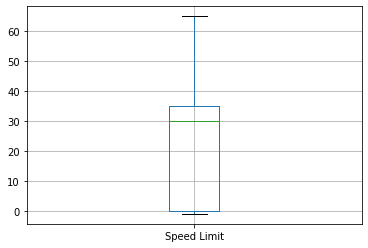

In [9]:
df.boxplot(column = "Speed Limit")

In [10]:
df1 = df.loc[:,df.dtypes==np.object]
df1

<ipython-input-10-e42d1e32723f>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1 = df.loc[:,df.dtypes==np.object]


,$1000 Damage to Any One Person's Property,Active School Zone Flag,Construction Zone Flag,Crash Severity,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,No,Incapacitating Injury,Friday,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,No,Non-Incapacitating Injury,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,No,Non-Incapacitating Injury,Monday,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,Dry,NaN,Clear,Not Worn
5,No,No,No,Non-Incapacitating Injury,Wednesday,Driveway Access,Daylight,US & State Highways,Main/Proper Lane,Wet,Signal Light,Rain,Not Worn
6,No,No,No,Non-Incapacitating Injury,Thursday,Intersection Related,Daylight,City Street,Main/Proper Lane,Dry,Marked Lanes,Clear,"Worn, Unk Damage"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,No,Non-Incapacitating Injury,Tuesday,Intersection Related,Daylight,City Street,Main/Proper Lane,Dry,Signal Light,Cloudy,Not Worn
2459,No,No,No,Non-Incapacitating Injury,Tuesday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,Dry,Center Stripe/Divider,Clear,Not Worn
2460,No,No,No,Not Injured,Thursday,Intersection Related,Daylight,City Street,Main/Proper Lane,Wet,Signal Light,Rain,Not Worn
2461,Yes,No,No,Non-Incapacitating Injury,Friday,Intersection,Daylight,City Street,Main/Proper Lane,Dry,Stop Sign,Clear,"Worn, Unk Damage"


In [11]:
df1["Crash Severity"].unique()

array(['Incapacitating Injury', 'Non-Incapacitating Injury',
       'Possible Injury', 'Not Injured', 'Killed'], dtype=object)

In [12]:
df1["Crash Severity"].value_counts()

Non-Incapacitating Injury    1430
Possible Injury               546
Incapacitating Injury         232
Not Injured                   155
Killed                         16
Name: Crash Severity, dtype: int64

In [13]:
df['Speed Limit'].value_counts()

 35    656
 30    539
-1     340
 0     276
 45    187
 40    184
 55     54
 25     50
 50     37
 60     15
 5       9
 10      9
 15      7
 20      7
 65      7
 36      1
 32      1
Name: Speed Limit, dtype: int64

<AxesSubplot:>

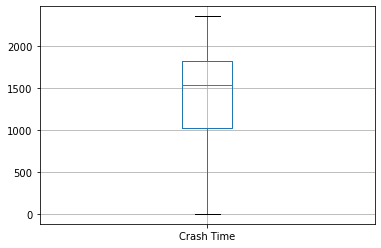

In [14]:
df.boxplot(column = "Crash Time")

<AxesSubplot:>

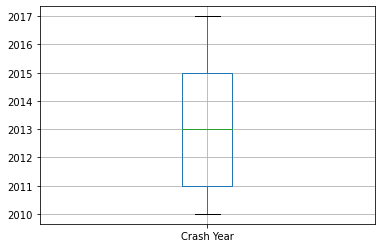

In [15]:
df.boxplot(column = "Crash Year")

In [37]:
df.groupby('Crash Severity').mean()

,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
Crash Severity,,,,,
Incapacitating Injury,0.487069,1448.732759,1.193966,2013.491379,27.905172
Killed,0.250000,1343.000000,0.187500,2013.875000,33.062500
Non-Incapacitating Injury,0.541958,1424.039860,1.046853,2013.348951,26.330769
Not Injured,0.529032,1380.038710,0.000000,2013.580645,23.470968
Possible Injury,0.545788,1403.186813,1.036630,2013.527473,25.904762


In [17]:
df.groupby('Day of Week').mean()

,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
Day of Week,,,,,
Friday,0.535545,1441.954976,0.966825,2013.436019,26.433649
Monday,0.531773,1428.173913,0.976589,2013.438127,26.076923
Saturday,0.509804,1353.088235,0.957516,2013.281046,24.604575
Sunday,0.522267,1305.364372,1.028340,2013.202429,28.125506
Thursday,0.553371,1452.820225,0.980337,2013.446629,25.469101
Tuesday,0.589474,1451.528947,0.947368,2013.568421,27.457895
Wednesday,0.490515,1445.075881,1.048780,2013.485095,25.769648


In [18]:
df.groupby('Light Condition').mean()

,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
Light Condition,,,,,
"Dark, Lighted",0.527607,1513.233129,1.055215,2013.425358,26.130879
"Dark, Not Lighted",0.428571,1495.371429,0.971429,2013.333333,30.095238
"Dark, Unknown Lighting",0.347826,1379.652174,1.000000,2012.956522,19.695652
Dawn,0.437500,865.125000,0.875000,2013.750000,27.750000
Daylight,0.547281,1384.767730,0.966903,2013.430260,26.176123
Dusk,0.585366,1811.170732,0.975610,2013.634146,25.024390


In [19]:
cors = df.corr()
cors

,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
At Intersection Flag,1.000000,0.073416,-0.025529,0.025431,-0.010315
Crash Time,0.073416,1.000000,-0.029721,0.030118,-0.069774
Crash Total Injury Count,-0.025529,-0.029721,1.000000,-0.038926,0.030529
Crash Year,0.025431,0.030118,-0.038926,1.000000,-0.082671
Speed Limit,-0.010315,-0.069774,0.030529,-0.082671,1.000000


In [20]:
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,NaN,Clear,Not Worn
5,No,No,True,No,Non-Incapacitating Injury,1408,1,2010,Wednesday,Driveway Access,Daylight,US & State Highways,Main/Proper Lane,0,Wet,Signal Light,Rain,Not Worn
6,No,No,False,No,Non-Incapacitating Injury,1715,1,2010,Thursday,Intersection Related,Daylight,City Street,Main/Proper Lane,35,Dry,Marked Lanes,Clear,"Worn, Unk Damage"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379 entries, 0 to 2462
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2379 non-null   object
 1   Active School Zone Flag                    2379 non-null   object
 2   At Intersection Flag                       2379 non-null   bool  
 3   Construction Zone Flag                     2379 non-null   object
 4   Crash Severity                             2379 non-null   object
 5   Crash Time                                 2379 non-null   int64 
 6   Crash Total Injury Count                   2379 non-null   int64 
 7   Crash Year                                 2379 non-null   int64 
 8   Day of Week                                2379 non-null   object
 9   Intersection Related                       2379 non-null   object
 10  Light Condition                     

In [22]:
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,NaN,Clear,Not Worn
5,No,No,True,No,Non-Incapacitating Injury,1408,1,2010,Wednesday,Driveway Access,Daylight,US & State Highways,Main/Proper Lane,0,Wet,Signal Light,Rain,Not Worn
6,No,No,False,No,Non-Incapacitating Injury,1715,1,2010,Thursday,Intersection Related,Daylight,City Street,Main/Proper Lane,35,Dry,Marked Lanes,Clear,"Worn, Unk Damage"


In [23]:
encode_Data =pd.get_dummies(df,columns =['Day of Week',
                                           'Intersection Related',
                                          'Light Condition',
                                          'Road Class',
                                          'Roadway Part',
                                          'Surface Condition',
                                          'Traffic Control Type',
                                          'Weather Condition',
                                          'Person Helmet'])

In [24]:
encode_Data.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Severity',
       'Crash Time', 'Crash Total Injury Count', 'Crash Year', 'Speed Limit',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Intersection Related_Driveway Access',
       'Intersection Related_Intersection',
       'Intersection Related_Intersection Related',
       'Intersection Related_Non Intersection',
       'Intersection Related_Not Reported', 'Light Condition_Dark, Lighted',
       'Light Condition_Dark, Not Lighted',
       'Light Condition_Dark, Unknown Lighting', 'Light Condition_Dawn',
       'Light Condition_Daylight', 'Light Condition_Dusk',
       'Road Class_City Street', 'Road Class_County Road',
       'Road Class_Farm To Market', 'Road Class_Interstate',
       'Road Class_Non Traff

In [25]:
encode_Data.drop(['Light Condition_Dark, Unknown Lighting',
                  "Traffic Control Type_Other (Explain In Narrative)",
                  "Surface Condition_Other (Explain In Narrative)",
                  "Person Helmet_Unknown If Worn",
                  'Weather Condition_Other (Explain In Narrative)',
                  'Road Class_Other Roads',
                  'Roadway Part_Other (Explain In Narrative)'
                 ],axis = 1,inplace= True)

In [26]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [27]:
encode_Data["$1000 Damage to Any One Person's Property"] = encoder.fit_transform(encode_Data["$1000 Damage to Any One Person's Property"])
encode_Data['Active School Zone Flag'] = encoder.fit_transform(encode_Data['Active School Zone Flag'])
encode_Data['At Intersection Flag'] = encoder.fit_transform(encode_Data['At Intersection Flag'])
encode_Data['Construction Zone Flag'] = encoder.fit_transform(encode_Data['Construction Zone Flag'])

In [28]:
encode_Data['Speed Limit'].unique()

array([45, 35,  0, 30, 40, 50, 55, 60, 25, 15, 65, 20, 10,  5, 36, -1, 32])

In [29]:
cors = encode_Data.corr().abs()
cors

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,Day of Week_Friday,Day of Week_Monday,...,Traffic Control Type_Yield Sign,Weather Condition_Blowing Sand/Snow,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Fog,Weather Condition_Rain,Person Helmet_Not Worn,"Person Helmet_Worn, Damaged","Person Helmet_Worn, Not Damaged","Person Helmet_Worn, Unk Damage"
$1000 Damage to Any One Person's Property,1.000000,0.003701,0.005377,0.011770,0.058509,0.113188,0.044104,0.013309,0.026291,0.004461,...,0.005920,0.012987,0.005231,0.012574,0.029905,0.007465,0.041086,0.061490,0.013194,0.044538
Active School Zone Flag,0.003701,1.000000,0.038090,0.004016,0.030347,0.000972,0.011980,0.016368,0.016501,0.013472,...,0.003947,0.000729,0.016779,0.024627,0.001263,0.007005,0.032290,0.009119,0.014485,0.009857
At Intersection Flag,0.005377,0.038090,1.000000,0.007857,0.073416,0.025529,0.025431,0.010315,0.000807,0.002209,...,0.026835,0.019130,0.017722,0.014249,0.014344,0.001837,0.041797,0.025908,0.054831,0.006201
Construction Zone Flag,0.011770,0.004016,0.007857,1.000000,0.001807,0.010532,0.038102,0.002990,0.016552,0.013972,...,0.012554,0.002317,0.028807,0.028559,0.004016,0.002428,0.019442,0.002289,0.024515,0.016726
Crash Time,0.058509,0.030347,0.073416,0.001807,1.000000,0.029721,0.030118,0.069774,0.020192,0.006902,...,0.017744,0.001495,0.126970,0.114431,0.052269,0.048910,0.024658,0.032923,0.028377,0.003564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weather Condition_Rain,0.007465,0.007005,0.001837,0.002428,0.048910,0.133578,0.031030,0.013044,0.001233,0.027970,...,0.001714,0.004043,0.451453,0.070538,0.007005,1.000000,0.003321,0.041393,0.008350,0.011693
Person Helmet_Not Worn,0.041086,0.032290,0.041797,0.019442,0.024658,0.005678,0.083807,0.008942,0.028447,0.041362,...,0.022193,0.018635,0.000743,0.005009,0.032290,0.003321,1.000000,0.282408,0.448591,0.305276
"Person Helmet_Worn, Damaged",0.061490,0.009119,0.025908,0.002289,0.032923,0.022808,0.011604,0.025197,0.022505,0.008029,...,0.012599,0.005263,0.021622,0.003762,0.009119,0.041393,0.282408,1.000000,0.104616,0.071193
"Person Helmet_Worn, Not Damaged",0.013194,0.014485,0.054831,0.024515,0.028377,0.030162,0.036365,0.029668,0.009865,0.038476,...,0.020466,0.008359,0.012160,0.020949,0.014485,0.008350,0.448591,0.104616,1.000000,0.113087


In [56]:
upper_tri = cors.where(np.triu(np.ones(cors.shape),k=1).astype(np.bool))
feature_col = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

<ipython-input-56-731f1a11c23f>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cors.where(np.triu(np.ones(cors.shape),k=1).astype(np.bool))


In [57]:
feature_col

['Surface Condition_Wet', 'Weather Condition_Cloudy', 'Weather Condition_Rain']

<AxesSubplot:>

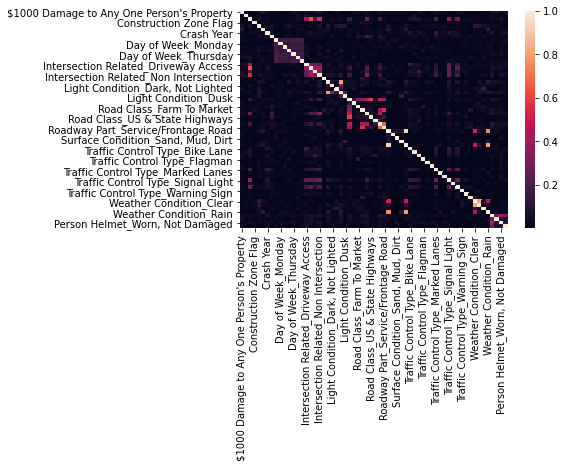

In [58]:
sns.heatmap(cors)

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(encode_Data.loc[:,encode_Data.columns!='Crash Severity'],
                                                encode_Data['Crash Severity'], test_size = 0.2,random_state = 4)


In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [102]:
#Accuracy

yrf_predict = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
round(accuracy_score(y_test,yrf_predict)* 100,1) 

69.1

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yrf_predict))
print(classification_report(y_test, yrf_predict))

[[  0   0  50   0   0]
 [  0   0   0   3   0]
 [  0   0 288   0   0]
 [  0   0   0  41   0]
 [  0   0  94   0   0]]
                           precision    recall  f1-score   support

    Incapacitating Injury       0.00      0.00      0.00        50
                   Killed       0.00      0.00      0.00         3
Non-Incapacitating Injury       0.67      1.00      0.80       288
              Not Injured       0.93      1.00      0.96        41
          Possible Injury       0.00      0.00      0.00        94

                 accuracy                           0.69       476
                macro avg       0.32      0.40      0.35       476
             weighted avg       0.48      0.69      0.57       476



/Users/pranay/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranay/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranay/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


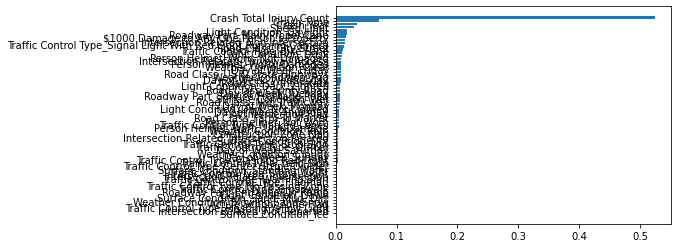

In [104]:
#Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [106]:
ygb_predict = gb_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
round(accuracy_score(y_test,ygb_predict) * 100,1)

68.1

In [96]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ygb_predict))
print(classification_report(y_test, ygb_predict))

[[  2   1  45   0   2]
 [  0   1   0   2   0]
 [  5   0 268   0  15]
 [  0   2   0  39   0]
 [  1   0  79   0  14]]
                           precision    recall  f1-score   support

    Incapacitating Injury       0.25      0.04      0.07        50
                   Killed       0.25      0.33      0.29         3
Non-Incapacitating Injury       0.68      0.93      0.79       288
              Not Injured       0.95      0.95      0.95        41
          Possible Injury       0.45      0.15      0.22        94

                 accuracy                           0.68       476
                macro avg       0.52      0.48      0.46       476
             weighted avg       0.61      0.68      0.61       476



In [107]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
model = xgb.XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test,y_pred)* 100,1) 

/Users/pranay/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


65.1